In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np
import pandas as pd
from autoemulate.compare import AutoEmulate

/Users/mstoffel/turing/projects/autoemulate/autoemulate/compare.py:15: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


# Shuang's data

In [2]:
case1 = '2964_1671247_500samples_LATQRSd_all'
case2 = '2964_3061856_500samples_LATQRSd_all'
case3 = '2964_3070993_500samples_LATQRSd_all'

# patient 1

In [3]:
dat = pd.read_csv(f'shuang/{case1}.csv')
y = dat[['QRSd']] # target 
X = dat.drop(columns=['QRSd']) # features
y.shape, X.shape

((500, 1), (500, 51))

### run  `AutoEmulate` with hyperparameter search in parallel on 6 cores:

In [28]:
em = AutoEmulate()
em.setup(X, y, param_search=True, n_jobs=6)
em.compare()

,Values
Simulation input shape (X),"(500, 51)"
Simulation output shape (y),"(500, 1)"
Proportion of data for testing (test_set_size),0.2
Scale input data (scale),True
Scaler (scaler),StandardScaler
Do hyperparameter search (param_search),True
Type of hyperparameter search (search_type),random
Number of sampled parameter settings (param_search_iters),20
Reduce dimensionality (reduce_dim),False
Cross validator (cross_validator),KFold


Initializing:   0%|          | 0/8 [00:00<?, ?it/s]

Pipeline(steps=[('scaler', StandardScaler()),
                ('model',
                 SupportVectorMachines(C=3.626832903084276, cache_size=337,
                                       coef0=0.7845400020200332,
                                       epsilon=0.12133785076265073,
                                       gamma='auto', kernel='linear',
                                       shrinking=False,
                                       tol=0.0002824791304975051))])

### average cross-validation results per model (training set)

In [29]:
em.summarise_cv()

,model,short,rmse,r2
0,SupportVectorMachines,svm,11.619386,0.534332
1,GaussianProcessTorch,gpt,11.704707,0.534157
2,LightGBM,lgbm,11.814976,0.519809
3,RadialBasisFunctions,rbf,11.923640,0.513348
4,ConditionalNeuralProcess,cnp,12.009593,0.510753
5,RandomForest,rf,12.202047,0.475897
6,GradientBoosting,gb,12.337513,0.475003
7,SecondOrderPolynomial,sop,16.516949,0.080688


Multiple outputs detected. Plotting the output variable with index 0. 
To plot other outputs, set `output_index` argument to the desired index.


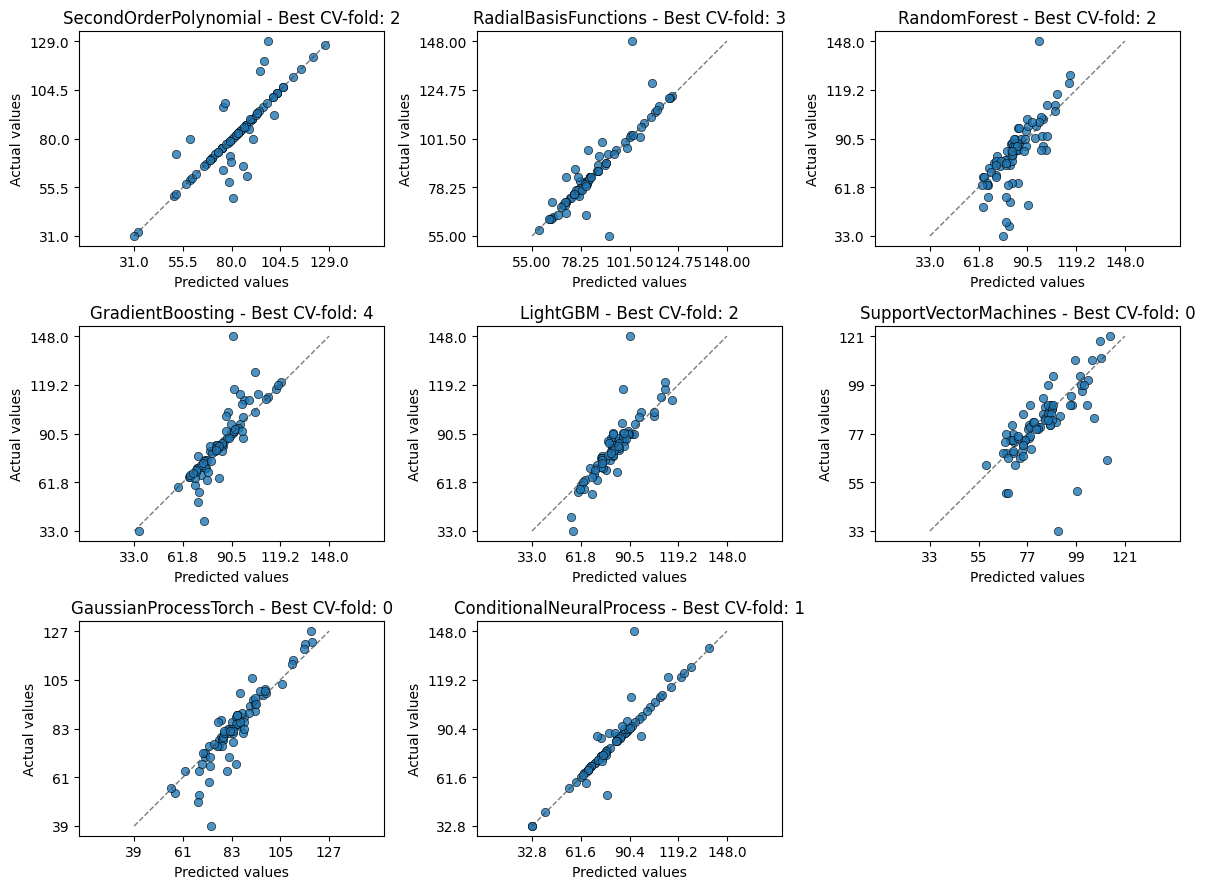

In [52]:
em.plot_cv(style="actual_vs_predicted")

### r2 on test set

Support Vector Regression (SVR) did best, with test set r2 ~ 0.7

In [54]:
svm = em.get_model(name="svm")
em.evaluate(svm)

,model,short,rmse,r2
0,SupportVectorMachines,svm,9.9334,0.6974


Usually, at this point the model has been chosen and we shouldn't evaluate the other models
on the test set anymore, except for we have another test set. But let's see how the Gaussian Process and the Conditional Neural Process are doing on the test set, out of curiosity

In [62]:
gp = em.get_model(name="gpt")
em.evaluate(gp)

,model,short,rmse,r2
0,GaussianProcessTorch,gpt,10.3689,0.6703


In [58]:
cnp = em.get_model(name="cnp")
em.evaluate(cnp)

,model,short,rmse,r2
0,ConditionalNeuralProcess,cnp,10.526,0.6602


we can plot how well the first 12 features predict QRSd (note: the R^2 is the test set R^2)

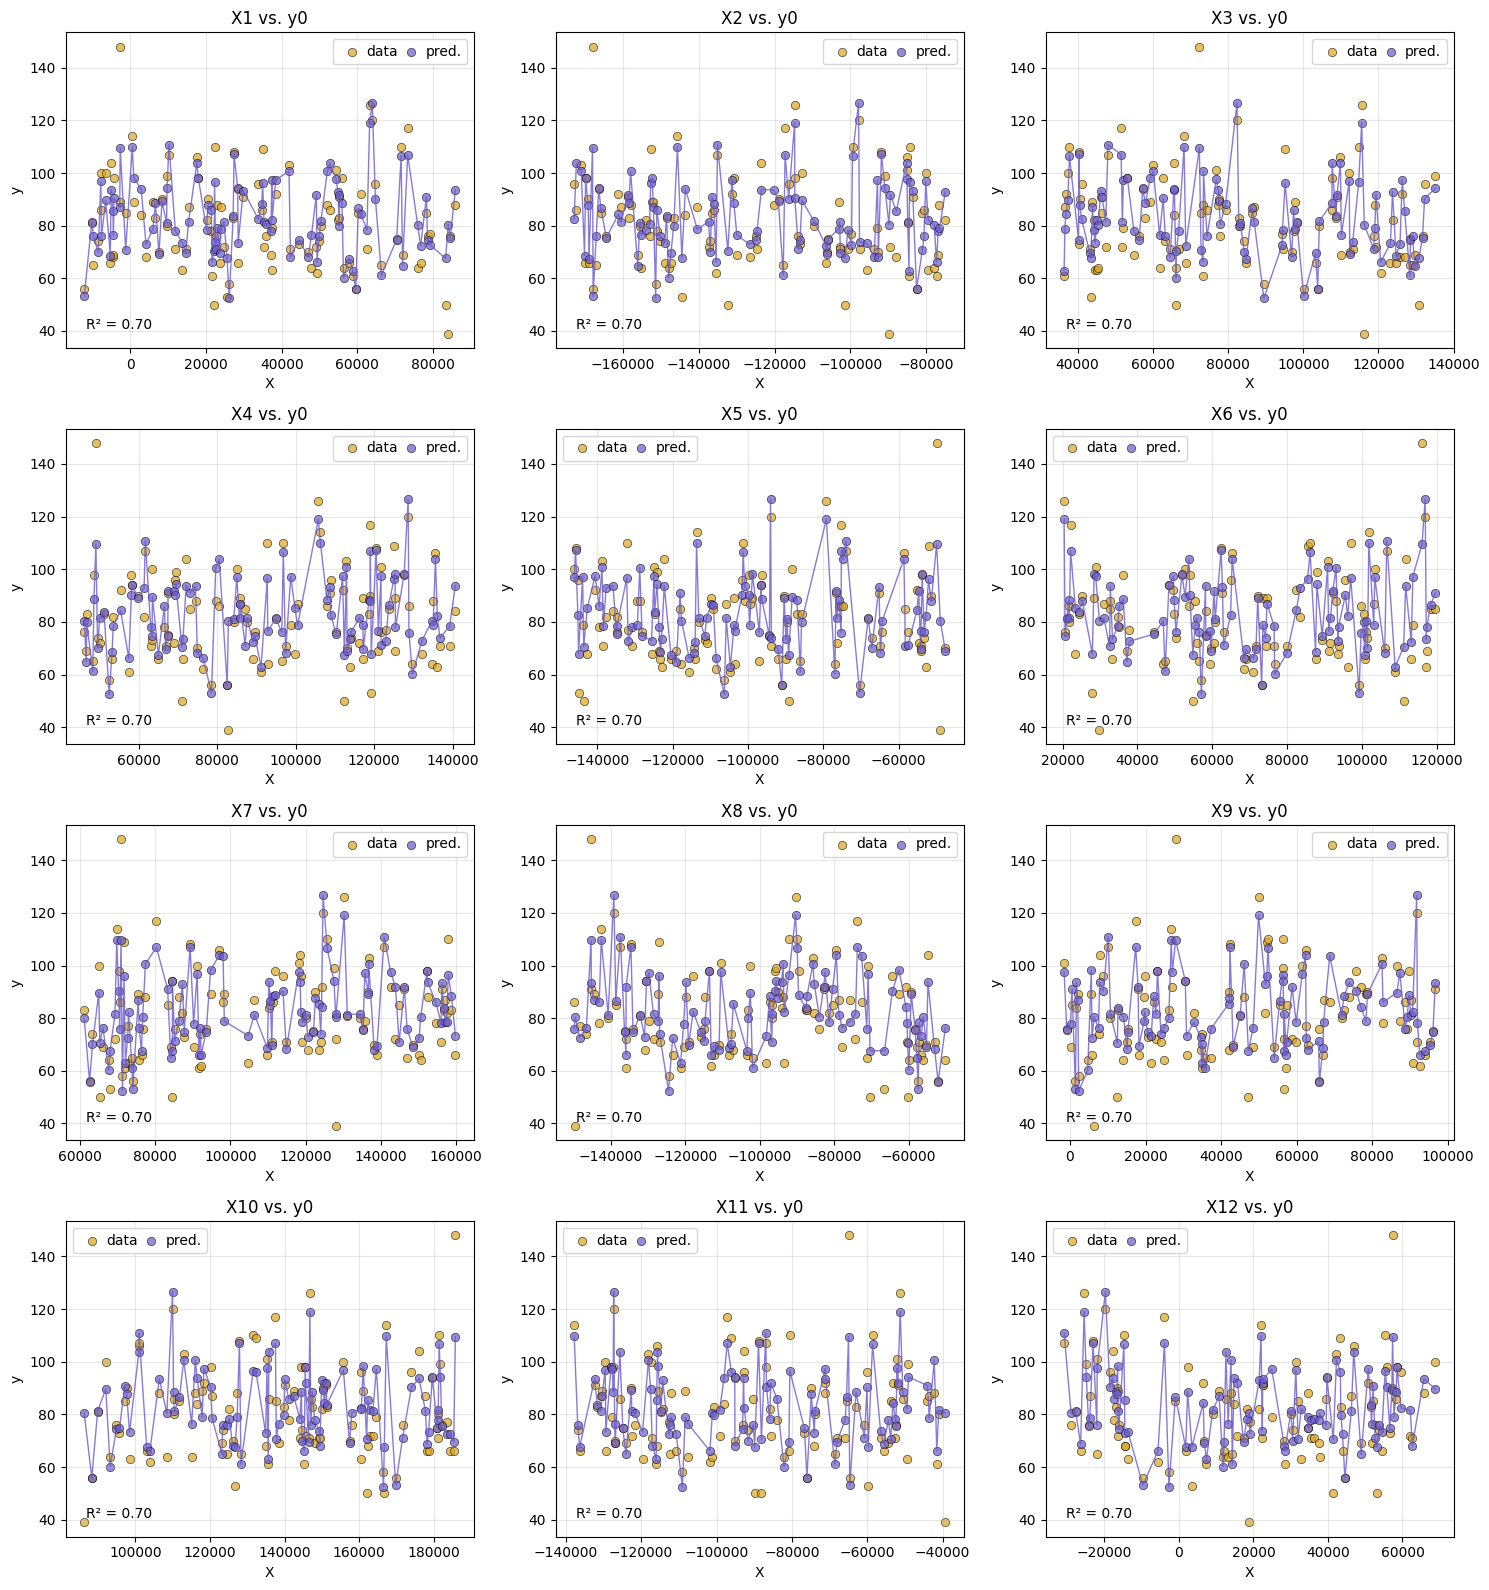

In [60]:
em.plot_eval(svm, input_index=list(range(1, 13)))

### which parameters did AutoEmulate choose?

for the GP: rbf + linear kernel, zero mean 

In [64]:
gp.get_params()

{'memory': None,
 'steps': [('scaler', StandardScaler()),
  ('model',
   GaussianProcessTorch(covar_module=<function GaussianProcessTorch.get_grid_params.<locals>.rbf_plus_linear at 0x2ba744180>,
                        lr=0.5, max_epochs=100,
                        mean_module=<function GaussianProcessTorch.get_grid_params.<locals>.zero_mean at 0x2ba7456c0>,
                        optimizer=<class 'torch.optim.adam.Adam'>))],
 'verbose': False,
 'scaler': StandardScaler(),
 'model': GaussianProcessTorch(covar_module=<function GaussianProcessTorch.get_grid_params.<locals>.rbf_plus_linear at 0x2ba744180>,
                      lr=0.5, max_epochs=100,
                      mean_module=<function GaussianProcessTorch.get_grid_params.<locals>.zero_mean at 0x2ba7456c0>,
                      optimizer=<class 'torch.optim.adam.Adam'>),
 'scaler__copy': True,
 'scaler__with_mean': True,
 'scaler__with_std': True,
 'model__covar_module': <function autoemulate.emulators.gaussian_process_torch.

for the SVM:

In [65]:
svm.get_params()

{'memory': None,
 'steps': [('scaler', StandardScaler()),
  ('model',
   SupportVectorMachines(C=3.626832903084276, cache_size=337,
                         coef0=0.7845400020200332, epsilon=0.12133785076265073,
                         gamma='auto', kernel='linear', shrinking=False,
                         tol=0.0002824791304975051))],
 'verbose': False,
 'scaler': StandardScaler(),
 'model': SupportVectorMachines(C=3.626832903084276, cache_size=337,
                       coef0=0.7845400020200332, epsilon=0.12133785076265073,
                       gamma='auto', kernel='linear', shrinking=False,
                       tol=0.0002824791304975051),
 'scaler__copy': True,
 'scaler__with_mean': True,
 'scaler__with_std': True,
 'model__C': 3.626832903084276,
 'model__cache_size': 337,
 'model__coef0': 0.7845400020200332,
 'model__degree': 3,
 'model__epsilon': 0.12133785076265073,
 'model__gamma': 'auto',
 'model__kernel': 'linear',
 'model__max_iter': -1,
 'model__normalise_y': True,
 '

# patient 2

In [68]:
# patient 2
dat = pd.read_csv(f'shuang/{case2}.csv')
# select column "QRSd" and put into y, remove from X
y = dat[['QRSd']]
X = dat.drop(columns=['QRSd'])
y.shape, X.shape

((500, 1), (500, 51))

In [69]:
em = AutoEmulate()
em.setup(X, y, param_search=True, n_jobs=6)
em.compare()
em.summarise_cv()

,Values
Simulation input shape (X),"(500, 51)"
Simulation output shape (y),"(500, 1)"
Proportion of data for testing (test_set_size),0.2
Scale input data (scale),True
Scaler (scaler),StandardScaler
Do hyperparameter search (param_search),True
Type of hyperparameter search (search_type),random
Number of sampled parameter settings (param_search_iters),20
Reduce dimensionality (reduce_dim),False
Cross validator (cross_validator),KFold


Initializing:   0%|          | 0/8 [00:00<?, ?it/s]

,model,short,rmse,r2
0,GaussianProcessTorch,gpt,15.668091,0.377088
1,SupportVectorMachines,svm,15.790684,0.375633
2,RadialBasisFunctions,rbf,15.853582,0.370942
3,ConditionalNeuralProcess,cnp,15.782944,0.368017
4,RandomForest,rf,16.031741,0.352398
5,GradientBoosting,gb,16.179087,0.329410
6,LightGBM,lgbm,16.265304,0.318543
7,SecondOrderPolynomial,sop,18.200171,0.155309


In [73]:
gp = em.get_model(name="gpt")
em.evaluate(gp)

,model,short,rmse,r2
0,GaussianProcessTorch,gpt,18.1437,0.3163


In [ ]:
gp = em.get_model(name="gpt")
em.evaluate_model(gp)

,model,short,rmse,r2
0,GaussianProcessTorch,gpt,17.865,0.337


# patient 3

In [77]:
# patient 2
dat = pd.read_csv(f'shuang/{case3}.csv')
# select column "QRSd" and put into y, remove from X
y = dat[['QRSd']]
X = dat.drop(columns=['QRSd'])
y.shape, X.shape

((500, 1), (500, 51))

In [78]:
em = AutoEmulate()
em.setup(X, y, param_search=True, n_jobs=6)
em.compare()
em.summarise_cv()

,Values
Simulation input shape (X),"(500, 51)"
Simulation output shape (y),"(500, 1)"
Proportion of data for testing (test_set_size),0.2
Scale input data (scale),True
Scaler (scaler),StandardScaler
Do hyperparameter search (param_search),True
Type of hyperparameter search (search_type),random
Number of sampled parameter settings (param_search_iters),20
Reduce dimensionality (reduce_dim),False
Cross validator (cross_validator),KFold


Initializing:   0%|          | 0/8 [00:00<?, ?it/s]

,model,short,rmse,r2
0,RadialBasisFunctions,rbf,11.210397,0.536392
1,SupportVectorMachines,svm,11.193456,0.532875
2,ConditionalNeuralProcess,cnp,11.528163,0.510796
3,RandomForest,rf,11.671959,0.499640
4,GaussianProcessTorch,gpt,11.575650,0.491644
5,GradientBoosting,gb,11.751083,0.488995
6,LightGBM,lgbm,11.762124,0.469406
7,SecondOrderPolynomial,sop,15.758122,0.095276


rmse's are all pretty equal, Random Forests often have the best generalisation 
performance for small datasets

In [90]:
rbf = em.get_model(name="rbf")
em.evaluate(rbf)

,model,short,rmse,r2
0,RadialBasisFunctions,rbf,11.4011,0.3847


In [91]:
rf = em.get_model(name="rf")
em.evaluate(rf)

,model,short,rmse,r2
0,RandomForest,rf,11.0641,0.4206


# Ludovica's data

- no parameter search so far

In [97]:
import pandas as pd
X = pd.read_csv('parameters.csv')
y = pd.read_csv('outputs.csv')
y = y.iloc[:, 0:9]
y

,PCAchest_9_of_9,PCAchest_8_of_9,PCAchest_7_of_9,PCAchest_6_of_9,PCAchest_5_of_9,PCAchest_4_of_9,PCAchest_3_of_9,PCAchest_2_of_9,PCAchest_1_of_9
0,0.6214,-0.3497,-1.4584,-3.4101,2.4353,2.8343,3.3233,3.5452,-9.2063
1,-1.2246,-2.2291,0.4694,6.3798,2.6773,3.9238,2.5098,-7.7107,-3.4125
2,-0.5726,1.0191,1.3553,3.1070,1.7170,4.3252,-1.5691,-7.1654,10.1124
3,1.2749,-0.6035,1.6343,2.0279,-1.9766,-1.3890,1.7400,9.3324,-15.5859
4,-2.0544,0.0792,1.3612,2.4234,2.6686,2.0239,-1.0980,-2.1637,-2.3520
...,...,...,...,...,...,...,...,...,...
2380,-2.2195,0.1096,-0.2768,-3.0550,0.9789,-2.8769,0.5856,4.0261,10.2776
2381,1.9184,-1.4789,-5.4460,3.0619,0.9317,-3.1412,12.2522,0.0992,24.4929
2382,-0.5570,2.3300,0.9328,0.2926,-0.3661,-1.6538,-0.4067,2.3774,-0.8568
2383,-1.4081,-1.4061,2.0349,1.5255,-3.3562,2.4379,-2.0065,-2.4488,0.4158


In [98]:
em = AutoEmulate()
em.setup(X, y, n_jobs=5, param_search=True)
em.compare()
em.summarise_cv()

,Values
Simulation input shape (X),"(2385, 41)"
Simulation output shape (y),"(2385, 9)"
Proportion of data for testing (test_set_size),0.2
Scale input data (scale),True
Scaler (scaler),StandardScaler
Do hyperparameter search (param_search),False
Reduce dimensionality (reduce_dim),False
Cross validator (cross_validator),KFold
Parallel jobs (n_jobs),5


Initializing:   0%|          | 0/8 [00:00<?, ?it/s]

,model,short,rmse,r2
0,GaussianProcessTorch,gpt,2.114035,0.495832
1,LightGBM,lgbm,2.317073,0.402316
2,GradientBoosting,gb,2.420548,0.367688
3,RandomForest,rf,2.499277,0.339079
4,SupportVectorMachines,svm,2.591702,0.327807
5,RadialBasisFunctions,rbf,2.575801,0.316619
6,ConditionalNeuralProcess,cnp,2.787865,0.188957
7,SecondOrderPolynomial,sop,3.408543,-0.268170


In [101]:
y.columns

Index(['PCAchest_9_of_9', 'PCAchest_8_of_9', 'PCAchest_7_of_9',
       'PCAchest_6_of_9', 'PCAchest_5_of_9', 'PCAchest_4_of_9',
       'PCAchest_3_of_9', 'PCAchest_2_of_9', 'PCAchest_1_of_9'],
      dtype='object')

In [122]:
rf = em.get_model(name="lgbm")
em.evaluate(rf, multioutput="raw_values")

,model,short,target,rmse,r2
0,LightGBM,lgbm,target_0,1.6095,0.1551
1,LightGBM,lgbm,target_1,1.4746,0.4847
2,LightGBM,lgbm,target_2,2.0385,0.0418
3,LightGBM,lgbm,target_3,1.4749,0.5868
4,LightGBM,lgbm,target_4,1.9589,0.2676
5,LightGBM,lgbm,target_5,3.2161,0.1275
6,LightGBM,lgbm,target_6,3.0102,0.3109
7,LightGBM,lgbm,target_7,3.0099,0.7024
8,LightGBM,lgbm,target_8,3.0095,0.8902


In [102]:
gp = em.get_model(name="gpt")
results = em.evaluate(gp, multioutput="raw_values")

In [105]:
results["names"] = y.columns
results

,model,short,target,rmse,r2,names
0,GaussianProcessTorch,gpt,target_0,1.5689,0.1972,PCAchest_9_of_9
1,GaussianProcessTorch,gpt,target_1,1.2434,0.6336,PCAchest_8_of_9
2,GaussianProcessTorch,gpt,target_2,1.9174,0.1523,PCAchest_7_of_9
3,GaussianProcessTorch,gpt,target_3,1.4025,0.6264,PCAchest_6_of_9
4,GaussianProcessTorch,gpt,target_4,1.9293,0.2895,PCAchest_5_of_9
5,GaussianProcessTorch,gpt,target_5,2.8682,0.3061,PCAchest_4_of_9
6,GaussianProcessTorch,gpt,target_6,2.7382,0.4299,PCAchest_3_of_9
7,GaussianProcessTorch,gpt,target_7,2.6498,0.7694,PCAchest_2_of_9
8,GaussianProcessTorch,gpt,target_8,2.8633,0.9006,PCAchest_1_of_9


In [109]:
# ludo's results
data = {
    'names': ['PCAchest_9_of_9', 'PCAchest_8_of_9', 'PCAchest_7_of_9', 'PCAchest_6_of_9', 'PCAchest_5_of_9', 
                'PCAchest_4_of_9', 'PCAchest_3_of_9', 'PCAchest_2_of_9', 'PCAchest_1_of_9'],
    'r2': [0.2921, 0.6738, 0.1540, 0.7828, 0.5009, 0.4373, 0.5027, 0.8434, 0.9252]
}
results_ludo = pd.DataFrame(data)

In [114]:
# compare r2's 
results["r2"], results_ludo["r2"]

(0    0.1972
 1    0.6336
 2    0.1523
 3    0.6264
 4    0.2895
 5    0.3061
 6    0.4299
 7    0.7694
 8    0.9006
 Name: r2, dtype: float64,
 0    0.2921
 1    0.6738
 2    0.1540
 3    0.7828
 4    0.5009
 5    0.4373
 6    0.5027
 7    0.8434
 8    0.9252
 Name: r2, dtype: float64)

tbc..